## Homework 4

Ruixue Gong, N17593858

**Description**: 

1. Show downward bias in estimation of AR(1) process

2. Use either Cython or Numba to increase loop speed

In [1]:
import numpy as np
import matplotlib.pyplot as plt


from numba import jit

**Parameters:**

alpha: the slopt $\alpha$ of equation listed below

beta: the intercept $\beta$ of equation listed below.

sigma: the standard deviation of normal distribution $N(0,1)$

nsim: the number of simulations when calculating $E(\hat(\alpha))$

n: the lenghth (observations) of time series

Firstly, we define a function to create a time series such that $X_{t+1}=\alpha X_t+\beta +\sigma W_t$, where $W_t\sim N(0,1)$

In [39]:

#Set params 
beta=1
sigma=2
nsim=6000       

alpha_list=[0.5+0.1*i for i in range(5)]
n_list=np.linspace(50,500,10)



In [35]:
#generate time series X_t.
def get_ts(alpha,n):
    x_0=beta/(1-alpha)     #unconditionall mean
    
    delta=200
    x=np.empty(delta+n+1)
    x[0]=x_0
    
    w=np.random.randn(len(x))
    
    for i in range(delta+n):
        x[i+1]=alpha*x[i]+beta+sigma*w[i+1]

    
    return x[delta:-1]


Secondly, we define a function bias
to compute bias, s.t, $bias=E(\hat{\alpha})-\alpha$

In [36]:
#compute mean of all estimates of alpha: alpha_hat

#use numba to increase loop speed
@jit
def bias(nsim,alpha,n):
    sum_m=0
    
    for i in range(nsim):
     
        x=get_ts(alpha,n)
        X=x[:-1]
        Y=x[1:]
        cov_mat = np.cov(X,Y)
        sum_m= sum_m+cov_mat[0][1]/cov_mat[0][0]
       
    return sum_m/nsim-alpha


In [37]:


#define a function to generate a sequence of biases with respect to alpha and list of n

def bias_array(nsim,alpha,n_list):
    return [bias(nsim,alpha,int(n)) for n in n_list]


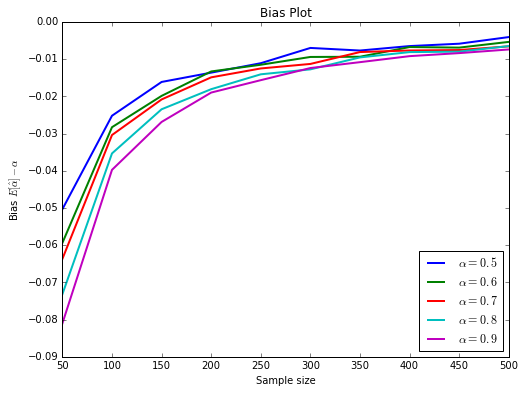

In [40]:
%matplotlib inline

fig, ax = plt.subplots(figsize = (8,6))


for alpha in alpha_list:
    x=n_list
    y=bias_array(nsim,alpha,n_list)
    label_of_line = r'$\alpha = {0:.1f}$'.format(alpha)
    ax.plot(x, y, linewidth=2, label = label_of_line)
    
    
plt.title('Bias Plot')
plt.xlabel('Sample size')
plt.ylabel('Bias ' r'$E[\hat{\alpha}]-\alpha$')
plt.legend(loc = 'lower right')
plt.show()